<a href="https://colab.research.google.com/github/attane007/Trading_strategy/blob/main/Gold_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buy Signal: 2012-11-12 00:00:00 - Price: 1728.35 - Asset: 0.58 stocks
Sell Signal: 2012-12-07 00:00:00 - Price: 1703.65 - Asset: $985.71
Buy Signal: 2013-08-23 00:00:00 - Price: 1396.85 - Asset: 0.71 stocks
Sell Signal: 2013-09-25 00:00:00 - Price: 1333.6 - Asset: $941.08
Buy Signal: 2014-02-10 00:00:00 - Price: 1274.9 - Asset: 0.74 stocks
Sell Signal: 2014-04-24 00:00:00 - Price: 1293.85 - Asset: $955.06
Buy Signal: 2014-06-26 00:00:00 - Price: 1317.95 - Asset: 0.72 stocks
Sell Signal: 2014-08-22 00:00:00 - Price: 1281.23 - Asset: $928.45
Buy Signal: 2015-01-13 00:00:00 - Price: 1230.88 - Asset: 0.75 stocks
Sell Signal: 2015-02-25 00:00:00 - Price: 1204.8 - Asset: $908.78
Buy Signal: 2015-05-18 00:00:00 - Price: 1225.74 - Asset: 0.74 stocks
Sell Signal: 2015-05-28 00:00:00 - Price: 1188.45 - Asset: $881.13
Buy Signal: 2015-10-09 00:00:00 - Price: 1157.53 - Asset: 0.76 stocks
Sell Signal: 2015-11-06 00:00:00 - Price: 1088.64 - Asset: $828.69
Buy Signal: 2016-01-26 00:00:00 - Price: 112

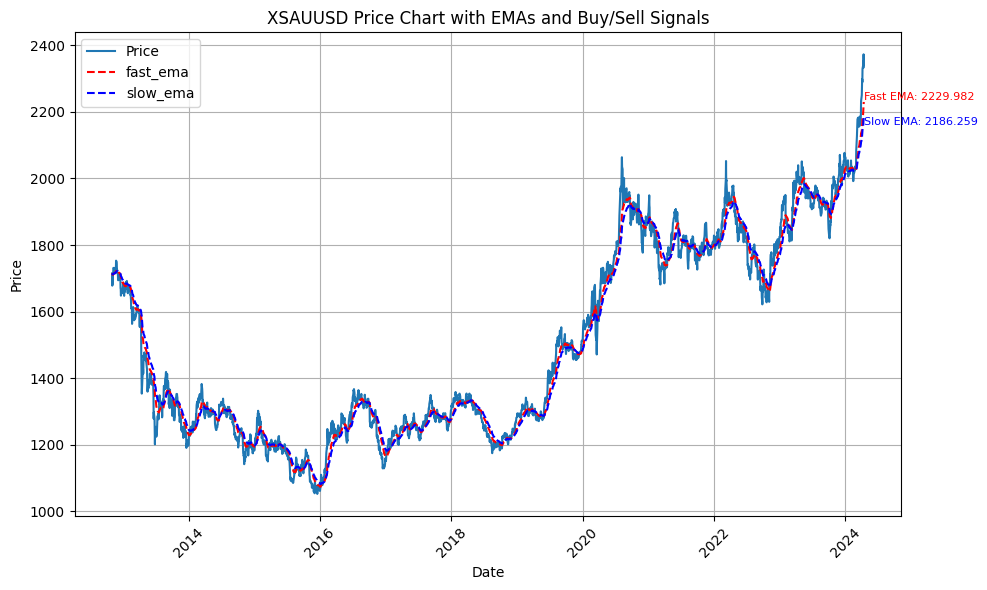

Initial USD: $1000
Final USD: $1491.74


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("XAU_USD Historical Data.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Remove commas from Price column and convert it to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Select only the last 100 rows
df = df.tail(4000)

# Calculate EMAs for the last 100 rows
fast_ema = df['Price'].ewm(span=29, adjust=False).mean().round(3)
slow_ema = df['Price'].ewm(span=45, adjust=False).mean().round(3)

# Initialize variables
initial_usd = 1000
usd_balance = initial_usd
stock_balance = 0
buy_price = 0

# Simulate buy and sell signals
for i in range(1, len(df)):
    if fast_ema.iloc[i] > slow_ema.iloc[i] and fast_ema.iloc[i-1] <= slow_ema.iloc[i-1]:
        # Buy signal
        if usd_balance > 0:
            stock_balance = usd_balance / df['Price'].iloc[i]
            usd_balance = 0
            buy_price = df['Price'].iloc[i]
            print(f"Buy Signal: {df['Date'].iloc[i]} - Price: {buy_price} - Asset: {stock_balance:.2f} stocks")
    elif fast_ema.iloc[i] < slow_ema.iloc[i] and fast_ema.iloc[i-1] >= slow_ema.iloc[i-1]:
        # Sell signal
        if stock_balance > 0:
            usd_balance = stock_balance * df['Price'].iloc[i]
            stock_balance = 0
            print(f"Sell Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: ${usd_balance:.2f}")

# Calculate final USD balance if still holding stocks
if stock_balance > 0:
    usd_balance = stock_balance * df['Price'].iloc[-1]

# Plot the price chart and EMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price', linestyle='-')
plt.plot(df['Date'], fast_ema, label='fast_ema', linestyle='--', color='red')
plt.plot(df['Date'], slow_ema, label='slow_ema', linestyle='--', color='blue')

# Annotate with the latest EMA values
plt.text(df['Date'].iloc[-1], fast_ema.iloc[-1], f'Fast EMA: {fast_ema.iloc[-1]}', fontsize=8, verticalalignment='bottom', horizontalalignment='left', color='red')
plt.text(df['Date'].iloc[-1], slow_ema.iloc[-1], f'Slow EMA: {slow_ema.iloc[-1]}', fontsize=8, verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('XSAUUSD Price Chart with EMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Initial USD: ${initial_usd}")
print(f"Final USD: ${usd_balance:.2f}")


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("XAU_USD Historical Data.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Remove commas from Price column and convert it to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Select only the last 100 rows
df = df.tail(300)

results = []

def simulate_trade(ema1=10, ema2=18):
  # Calculate EMAs for the last 100 rows
  fast_ema = df['Price'].ewm(span=ema1, adjust=False).mean().round(3)
  slow_ema = df['Price'].ewm(span=ema2, adjust=False).mean().round(3)

  # Initialize variables
  initial_usd = 1000
  usd_balance = initial_usd
  stock_balance = 0
  buy_price = 0

  # Simulate buy and sell signals
  for i in range(1, len(df)):
      if fast_ema.iloc[i] > slow_ema.iloc[i] and fast_ema.iloc[i-1] <= slow_ema.iloc[i-1]:
          # Buy signal
          if usd_balance > 0:
              stock_balance = usd_balance / df['Price'].iloc[i]
              usd_balance = 0
              buy_price = df['Price'].iloc[i]
              # print(f"Buy Signal: {df['Date'].iloc[i]} - Price: {buy_price} - Asset: {stock_balance:.2f} stocks")
      elif fast_ema.iloc[i] < slow_ema.iloc[i] and fast_ema.iloc[i-1] >= slow_ema.iloc[i-1]:
          # Sell signal
          if stock_balance > 0:
              usd_balance = stock_balance * df['Price'].iloc[i]
              stock_balance = 0
              # print(f"Sell Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: ${usd_balance:.2f}")

  # Calculate final USD balance if still holding stocks
  if stock_balance > 0:
      usd_balance = stock_balance * df['Price'].iloc[-1]

  results.append((ema1, ema2, usd_balance))

  # print(f"Fast_EMA={ema1} Slow_EMA={ema2} Initial USD: ${initial_usd} Final USD: ${usd_balance:.2f}")

for i in range(3, 50):
    for j in range(40,90):
      simulate_trade(i,j)

# Sort results by final USD balance in descending order
results.sort(key=lambda x: x[2], reverse=True)

# Show top 10 combinations
print("\n\nTop 10 combinations of EMAs with the highest profit:")
for idx, result in enumerate(results[:10], 1):
    print(f"{idx}. Fast_EMA={result[0]}, Slow_EMA={result[1]}, Final USD: ${result[2]:.2f}")



Top 10 combinations of EMAs with the highest profit:
1. Fast_EMA=35, Slow_EMA=40, Final USD: $1201.53
2. Fast_EMA=35, Slow_EMA=41, Final USD: $1201.53
3. Fast_EMA=36, Slow_EMA=40, Final USD: $1201.53
4. Fast_EMA=12, Slow_EMA=68, Final USD: $1197.80
5. Fast_EMA=12, Slow_EMA=69, Final USD: $1196.61
6. Fast_EMA=6, Slow_EMA=84, Final USD: $1195.12
7. Fast_EMA=6, Slow_EMA=85, Final USD: $1195.12
8. Fast_EMA=6, Slow_EMA=89, Final USD: $1194.51
9. Fast_EMA=4, Slow_EMA=57, Final USD: $1194.05
10. Fast_EMA=31, Slow_EMA=43, Final USD: $1193.82
